In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [2]:
def gen_data():
    X = []
    y = []
    for i in range(0,100):
        X.append(np.random.uniform(1,0))
        epsilon = np.random.uniform(-0.3,0.3)
        y.append(math.sin(2 * math.pi * X[i]) + epsilon)
    return(X,y)  

In [3]:
def mse_loss(y_cap,y):
    return (0.5 * ((y_cap - y)**2))

def mse_loss_derv(y_cap,y):
    return (2 * (y_cap - y))

def gen_thetas(M):
    poly = np.random.uniform(-0.5,0.5, M)
    return poly


In [26]:
def poly_model(x, thetas):
    y_cap = np.sum([(thetas[i])*x**i for i in range(len(thetas))])
    return(y_cap)

def poly_model_derv(x, i):
    if i == 0:
        return 1
    else:
        return x**i

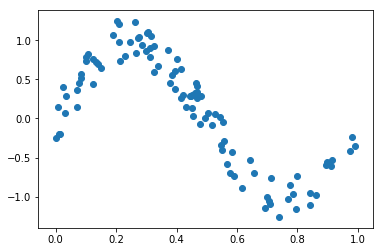

In [66]:
M = 5
lr = 0.1

X,y = gen_data()

thetas = gen_thetas(M)

plt.scatter(X,y)
plt.show()

In [6]:
def prediction(X,thetas):
    y_predicted = []
    for i in range(100):
        y_predicted.append(poly_model(X[i],thetas))
    return y_predicted

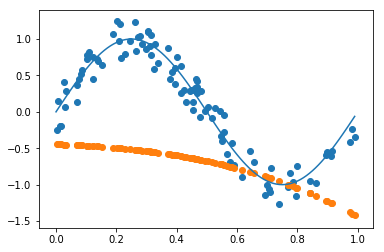

In [67]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X,y)

time = np.arange(0,1,0.01)
amplitude = np.sin(2*np.pi*time)
ax.plot(time,amplitude)

plt.scatter(X,prediction(X,thetas))
plt.show()

In [35]:
def sgd(Xg,yg,lr,epochs=100):

    for k in range(5000):
        loss = []
        for i in range(epochs):
            y_cap = poly_model(Xg[i],thetas)
            loss.append(mse_loss(y_cap,yg[i]))
       
            for j in range(M):
            
                gradient = mse_loss_derv(y_cap,yg[i]) * poly_model_derv(Xg[i],j)
                thetas[j] = thetas[j] - (lr * gradient)

    return loss,thetas

In [68]:
l,t = sgd(X,y,lr)

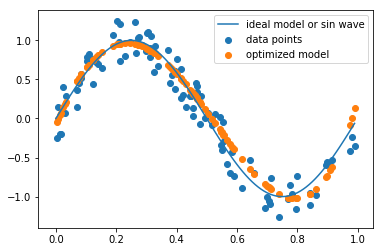

In [72]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X,y, label='data points')

time = np.arange(0,1,0.01)
amplitude = np.sin(2*np.pi*time)
ax.plot(time,amplitude, label='ideal model or sin wave')

y_new = prediction(X,t)
plt.scatter(X,y_new, label='optimized model')
plt.legend()
plt.show()


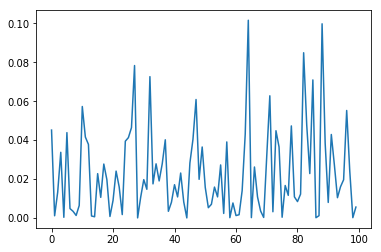

100


In [52]:
plt.plot(np.arange(100),l)
plt.show()
print(len(l))